<a href="https://colab.research.google.com/github/viktor1181/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline 

In [37]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [38]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

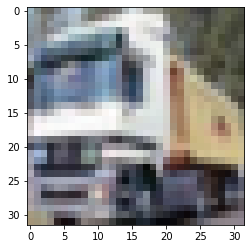

Номер класса: [9]
Тип объекта: грузовик


In [39]:
n = 1
plt.imshow(X_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

In [40]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [41]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [42]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [43]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [44]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)         

In [45]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=25,
              validation_split=0.1,
              shuffle=True,
              verbose=1)

Epoch 1/25
352/352 [==============================] - 4s 11ms/step - loss: 1.8675 - accuracy: 0.3120 - val_loss: 1.2544 - val_accuracy: 0.5760
Epoch 2/25
352/352 [==============================] - 4s 10ms/step - loss: 1.2660 - accuracy: 0.5448 - val_loss: 1.0056 - val_accuracy: 0.6478
Epoch 3/25
352/352 [==============================] - 4s 10ms/step - loss: 1.0784 - accuracy: 0.6187 - val_loss: 0.9083 - val_accuracy: 0.6838
Epoch 4/25
352/352 [==============================] - 4s 10ms/step - loss: 0.9542 - accuracy: 0.6633 - val_loss: 0.8513 - val_accuracy: 0.7092
Epoch 5/25
352/352 [==============================] - 4s 10ms/step - loss: 0.8702 - accuracy: 0.6929 - val_loss: 0.7819 - val_accuracy: 0.7330
Epoch 6/25
352/352 [==============================] - 4s 10ms/step - loss: 0.8150 - accuracy: 0.7114 - val_loss: 0.7402 - val_accuracy: 0.7508
Epoch 7/25
352/352 [==============================] - 4s 10ms/step - loss: 0.7599 - accuracy: 0.7306 - val_loss: 0.7300 - val_accuracy: 0.7518

In [49]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 78.02%


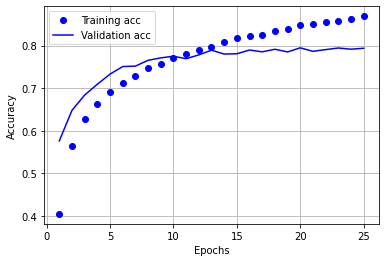

In [50]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

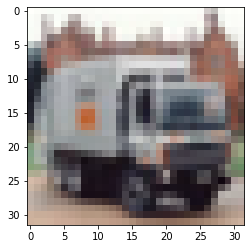

In [51]:
index=11
plt.imshow(X_test[index])
plt.show()

In [52]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

In [53]:
prediction = model.predict(x)

In [54]:
print(prediction)

[[1.7015606e-11 9.3794987e-04 1.5676325e-14 1.6831599e-13 1.1607262e-19
  1.2493000e-16 8.7592494e-20 1.1125851e-14 5.4748950e-10 9.9906212e-01]]


**Запускаем распознавание**

In [55]:
prediction = np.argmax(prediction)
print(classes[prediction])

грузовик


In [56]:
print(classes[y_test[index][0]])

грузовик


In [68]:
outputs = [layer.output for layer in model.layers]          # all layer outputs
outputs

[<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'dropout_3')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'dropout_4')>,
 <KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dropout_5')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>]

In [86]:
from keras.models import Model

layer_name = 'conv2d_3'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_test)

In [87]:
intermediate_output

array([[[[0.00000000e+00, 1.50238909e-03, 7.90795162e-02, ...,
          0.00000000e+00, 7.46879280e-02, 1.51019990e-02],
         [0.00000000e+00, 0.00000000e+00, 2.60020196e-01, ...,
          0.00000000e+00, 1.53327405e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 2.65268475e-01, ...,
          0.00000000e+00, 1.60645112e-01, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 2.41744235e-01, ...,
          0.00000000e+00, 1.57397181e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 2.25755811e-01, ...,
          0.00000000e+00, 1.55713901e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 2.10853368e-01, ...,
          0.00000000e+00, 1.65132135e-01, 0.00000000e+00]],

        [[1.13607809e-01, 0.00000000e+00, 2.12530583e-01, ...,
          8.06723684e-02, 0.00000000e+00, 1.02748945e-01],
         [4.04750519e-02, 0.00000000e+00, 3.16301197e-01, ...,
          2.83023566e-02, 0.00000000e+00, 7.69410655e-02],
        

In [69]:
model.layers[0]._name='conv2d_3'
print(model.layers[0].name)

conv2d_3


In [80]:
import tensorflow as tf
def visualize_conv_layer(layer_name):
  
  layer_output=model.get_layer(layer_name).output

  intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)

  intermediate_prediction=intermediate_model.predict(X_test[11])
  
  row_size=4
  col_size=8
  
  img_index=0

  print(np.shape(intermediate_prediction))
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))

  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')

      img_index=img_index+1

In [81]:
visualize_conv_layer("conv2d_3")

ValueError: ignored